In [39]:
import cvxpy as cvx
import numpy as np
from time import time
from scipy.stats import multivariate_normal

In [54]:
N = 100
n_s = [i*10 for i in range(1, 11)] 
noise = np.random.normal(0, 2, N)
minimums = []
time_stat = []
xvalue = []
fvalue = []
for n in n_s:
    time1 = []
    xvalue1 = []
    fvalue1 = []
    for popitka in range(50):
        X = np.random.multivariate_normal(([0]*n), np.eye(n), N) #генерация зависимых переменных?
        y = np.sum(X) + noise #генерация истинных значений
        t1 = time()
        x = cvx.Variable(n)
        obj = cvx.Minimize(cvx.norm(X @ x - y)) # по умолчанию используется вторая норма

        # формулируем задачу и решаем
        prob = cvx.Problem(obj)
        prob.solve()
        t2 = time()
        time1.append(t2 - t1)
        xvalue1.append(x.value)
        fvalue1.append(prob.value)

#         print(prob.status) # optimal
#         print(prob.value) # f0(x*)
#         print(x.value) # (x*)
    time_stat.append(np.median(time1))
    xvalue.append(xvalue1)
    fvalue.append(fvalue1)
    

In [55]:
time_stat, xvalue[0][0], fvalue[0][0]

([0.004015684127807617,
  0.0049866437911987305,
  0.005984067916870117,
  0.00700533390045166,
  0.008007407188415527,
  0.0089949369430542,
  0.009973526000976562,
  0.011967778205871582,
  0.01396191120147705,
  0.012964963912963867],
 array([ 0.46369219,  0.19700765, -0.4421127 , -0.11114801,  0.66855833,
        -0.25499327,  0.03205079, -0.16958114,  0.21169999,  0.4940743 ]),
 27.572303826167772)

In [49]:
import matplotlib.pyplot as plt

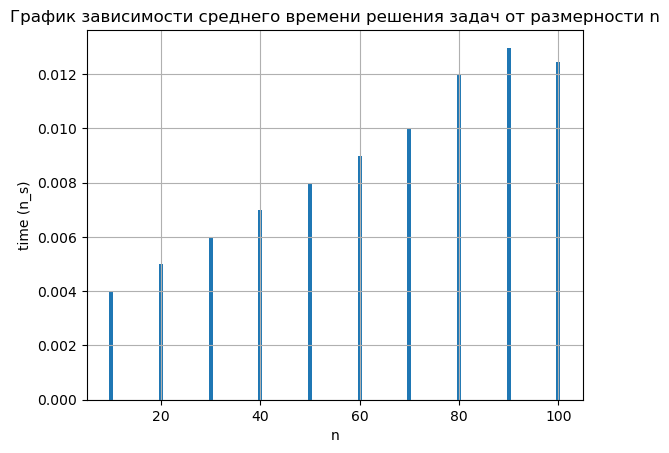

In [48]:
fig, ax = plt.subplots()
ax.bar(n_s, time_stat)

ax.set(xlabel='n', ylabel='time (n_s)',
       title='График зависимости среднего времени решения задач от размерности n')
ax.grid()

plt.show()

In [ ]:
# N = 100
# n_s = [i*10 for i in range(1, 11)] 
# noise = np.random.normal(0, 5, N)
# minimums = []
# time_stat = []
# for n in n_s:
#     time1 = []
#     for popitka in range(50):
#         X = np.random.multivariate_normal(([0]*n), np.eye(n), N) #генерация зависимых переменных?
#         y = np.sum(X) + noise #генерация истинных значений
        
#         x = cvx.Variable(n)
#         obj = cvx.Minimize(cvx.norm(X @ x - y)) # по умолчанию используется вторая норма

#         # формулируем задачу и решаем
#         prob = cvx.Problem(obj)
#         prob.solve()
#         t1 = time()
#         #алгорит min = алгоритм1 vs cvx
#         t2 = time()
#         time1.append(t2 - t1)

# #         print(prob.status) # optimal
# #         print(prob.value) # 13.9999999869
# #         print(x.value) # [[-2.] [ 3.]]
#     time_stat.append(np.median(time1))
    